# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('previsao_de_renda.csv')

In [3]:
df.head(5)

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


Já vou remover as variáveis `Unnamed: 0` e `index` pois elas apenas atrapalharão.

In [4]:
df = df.drop(columns=['Unnamed: 0', 'index'])
df.head(5)

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

Vou criar essa função `make_graph()`, a qual está toda ajeitada para plotar um countplot do mesmo tamanho com o mesmo eixo x, sendo necessário apenas passar o argumento que irá compor o `hue` do countplot, ou seja, passar a variável qualitativa.

In [50]:
def make_graph(hue: str):
    fig = plt.gcf()
    fig.set_size_inches( 10, 5)

    g = sns.countplot(data=df, x='data_ref', hue=hue)
    g = plt.xticks(rotation=90)
    return g

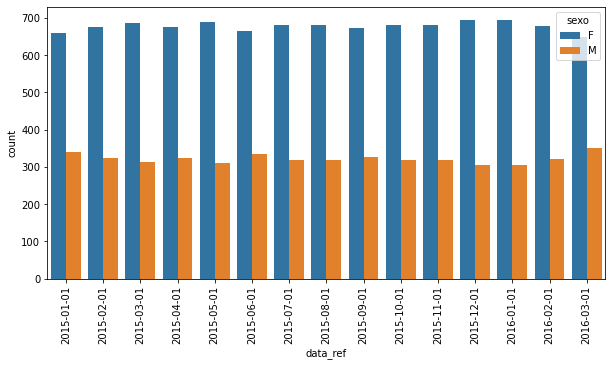

In [54]:
sexo = make_graph('sexo')

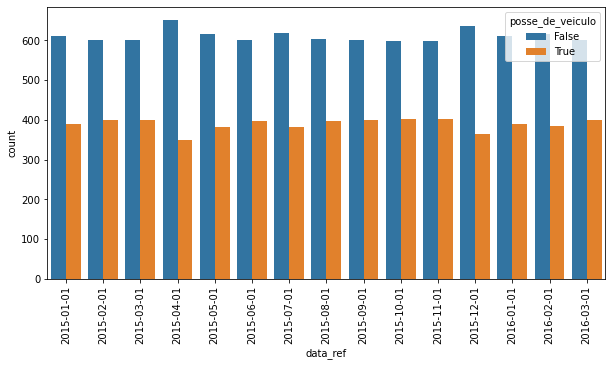

In [56]:
posse_de_veiculo = make_graph('posse_de_veiculo')

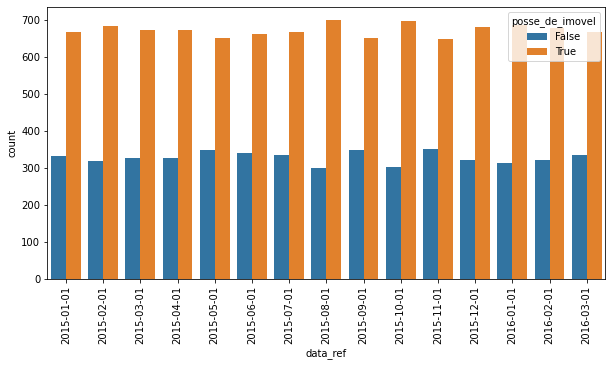

In [57]:
posse_de_imovel = make_graph('posse_de_imovel')

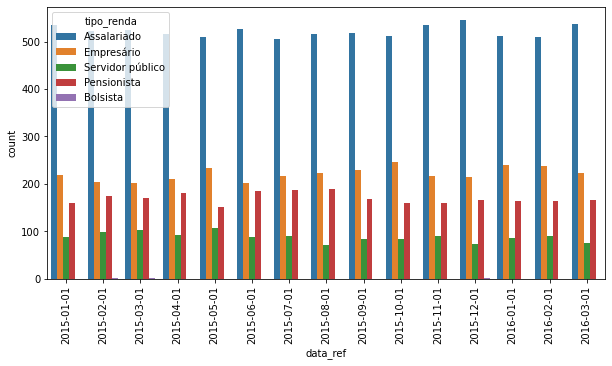

In [58]:
tipo_renda = make_graph('tipo_renda')

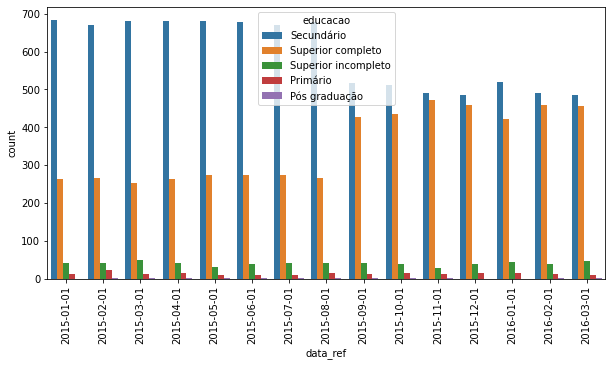

In [59]:
educacao = make_graph('educacao')

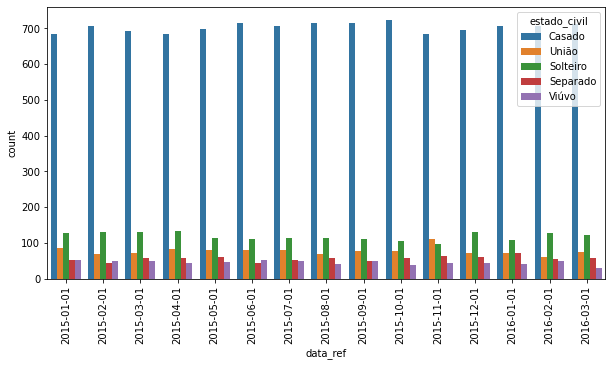

In [60]:
estado_civil = make_graph('estado_civil')

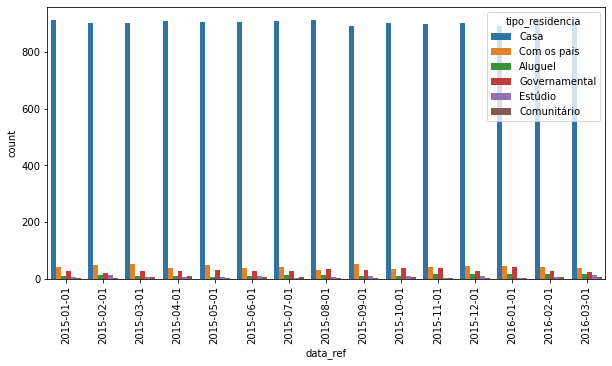

In [62]:
tipo_residencia = make_graph('tipo_residencia')

Não notei nenhuma variação significativa pelo tempo na maioria das variáveis qualitativas. Porém se tratando da variável `educacao`, notei que o número de formados no ensino superior cresceu, enquanto o número de formados apenas no nível secundário diminiui. Consideraria importante estudar essa variável mais afundo antes de continuar com futuros modelos.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

In [72]:
def make_point_graph(hue: str):

    fig = plt.gcf()
    fig.set_size_inches( 10, 5)

    g = sns.pointplot(x="data_ref", y='renda', hue=hue, data=df, dodge=True, ci = 95)
    g = plt.xticks(rotation=90)
    
    return g

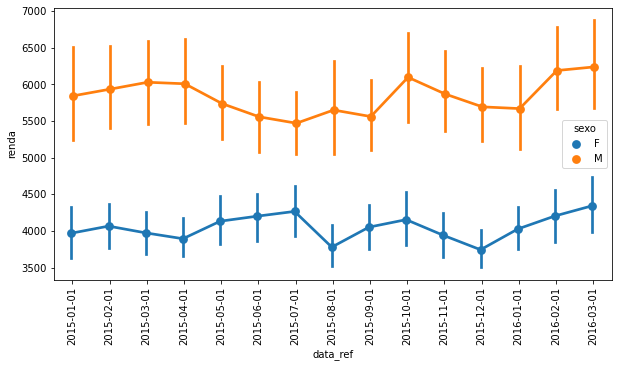

In [76]:
sexo = make_point_graph('sexo')

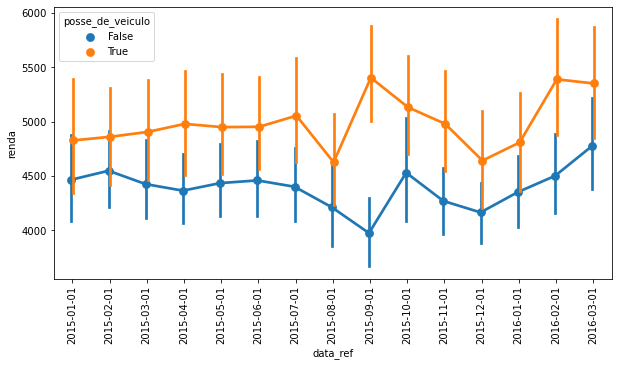

In [77]:
posse_de_veiculo = make_point_graph('posse_de_veiculo')

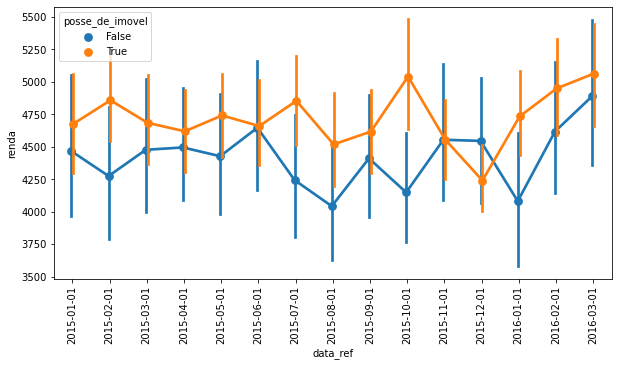

In [78]:
posse_de_imovel = make_point_graph('posse_de_imovel')

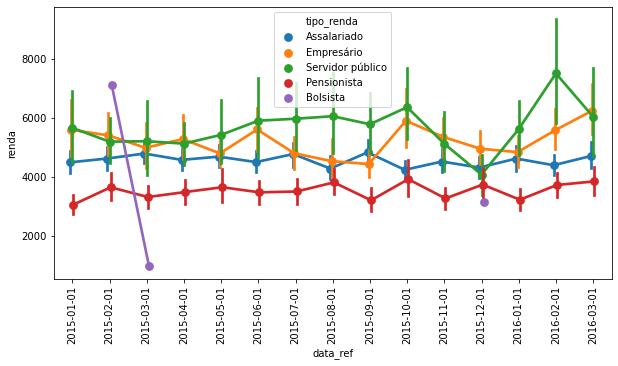

In [80]:
tipo_renda = make_point_graph('tipo_renda')

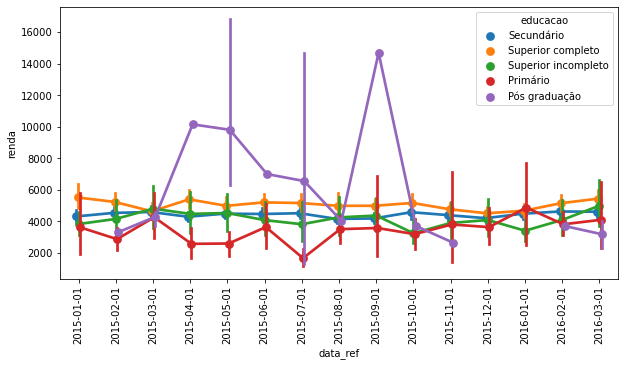

In [73]:
educacao = make_point_graph('educacao')

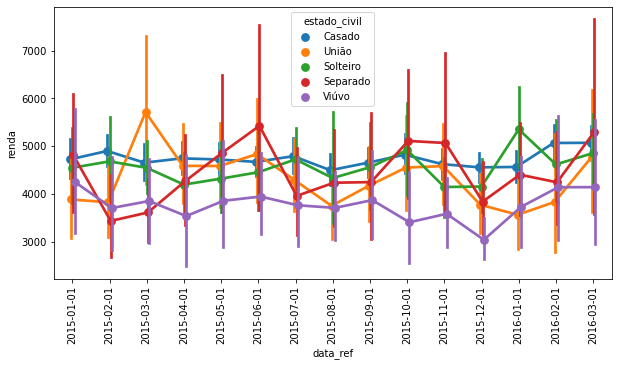

In [75]:
estado_civil = make_point_graph('estado_civil')

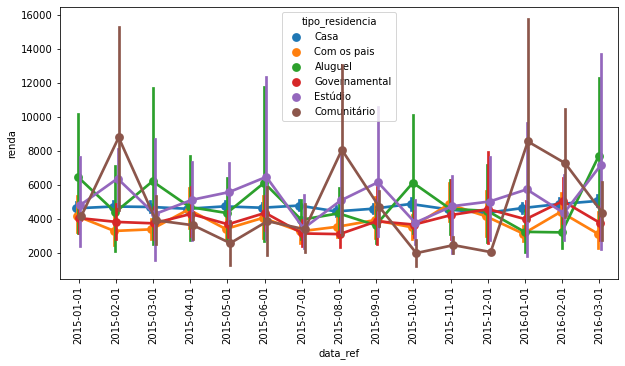

In [74]:
tipo_residencia = make_point_graph('tipo_residencia')

Acredito que a variável educação, novamente, precisa ser estudada mais afundo. Entre os meses de agosto e setembro de 2015, ocorreu um salto muito grande e incomum de pessoas com pós graduação.